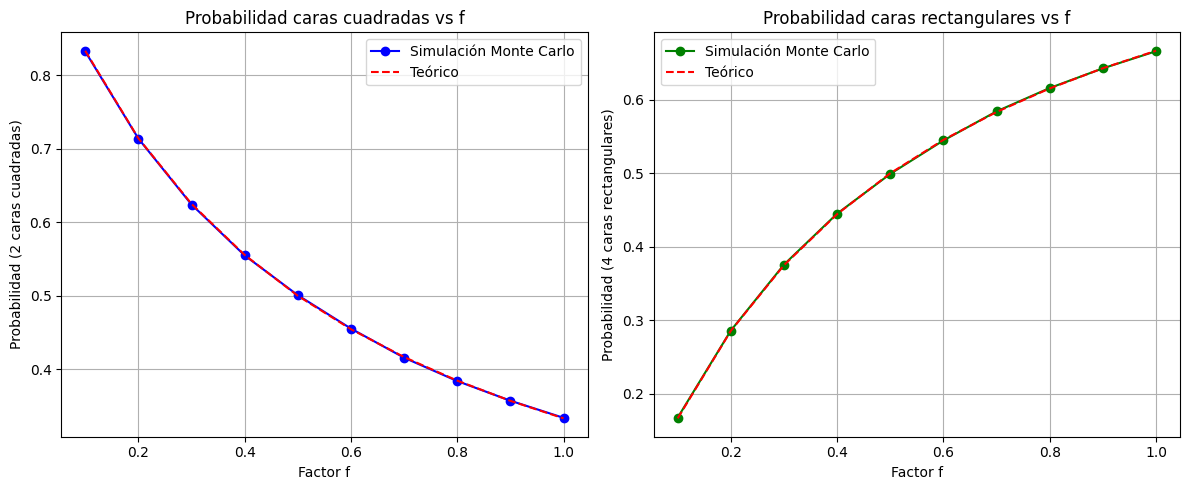

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
N = 100000  # Número de lanzamientos por simulación
f_values = np.linspace(0.1, 1.0, 10)  # Valores de f desde 0.1 hasta 1.0

# Listas para almacenar resultados
prob_cuadradas_sim = []  # Probabilidad simulada (caras cuadradas)
prob_rectangulares_sim = []  # Probabilidad simulada (caras rectangulares)
prob_cuadradas_teo = []  # Probabilidad teórica (caras cuadradas)
prob_rectangulares_teo = []  # Probabilidad teórica (caras rectangulares)

# Simulación Monte Carlo para cada f
for f in f_values:
    # Áreas de las caras (normalizadas L^2 = 1)
    area_rectangular = f  # 4 caras rectangulares de área f*L² (L=1)
    area_cuadrada = 1.0  # 2 caras cuadradas de área L² (L=1)

    # Probabilidades teóricas (por cara individual)
    P_total = 4 * area_rectangular + 2 * area_cuadrada
    P_rectangular_teo = area_rectangular / P_total  # Prob. por cara rectangular
    P_cuadrada_teo = area_cuadrada / P_total  # Prob. por cara cuadrada

    # Probabilidades totales (para todas las caras de cada tipo)
    prob_rectangulares_teo.append(4 * P_rectangular_teo)  # 4 caras rectangulares
    prob_cuadradas_teo.append(2 * P_cuadrada_teo)  # 2 caras cuadradas

    # Simulación Monte Carlo
    # Generamos N lanzamientos aleatorios según las áreas
    choices = np.random.choice(
        a=['rectangular', 'cuadrada'],
        size=N,
        p=[4 * area_rectangular / (4 * area_rectangular + 2 * area_cuadrada),
           2 * area_cuadrada / (4 * area_rectangular + 2 * area_cuadrada)]
    )

    # Contamos resultados
    count_rectangular = np.sum(choices == 'rectangular')
    count_cuadrada = N - count_rectangular

    # Probabilidades simuladas
    prob_rectangulares_sim.append(count_rectangular / N)
    prob_cuadradas_sim.append(count_cuadrada / N)

# Gráficas
plt.figure(figsize=(12, 5))

# Gráfica 1: Probabilidad caras cuadradas (2 caras) vs f
plt.subplot(1, 2, 1)
plt.plot(f_values, prob_cuadradas_sim, 'bo-', label='Simulación Monte Carlo')
plt.plot(f_values, prob_cuadradas_teo, 'r--', label='Teórico')
plt.xlabel('Factor f')
plt.ylabel('Probabilidad (2 caras cuadradas)')
plt.title('Probabilidad caras cuadradas vs f')
plt.legend()
plt.grid(True)

# Gráfica 2: Probabilidad caras rectangulares (4 caras) vs f
plt.subplot(1, 2, 2)
plt.plot(f_values, prob_rectangulares_sim, 'go-', label='Simulación Monte Carlo')
plt.plot(f_values, prob_rectangulares_teo, 'r--', label='Teórico')
plt.xlabel('Factor f')
plt.ylabel('Probabilidad (4 caras rectangulares)')
plt.title('Probabilidad caras rectangulares vs f')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()